In [2]:
import pandas as pd

In [5]:
data_folder = "./data/"

In [6]:
abalone = pd.read_csv(data_folder+'abalone.data',header = None)

In [7]:
abalone.head (3)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [8]:
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
'Whole weight','Shucked weight', 'Viscera weight', 'Shell weight',
'Rings']

In [9]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 1.2 Structuring Features According to Type

In [13]:
xls = 'http://www.biostatisticien.eu/springeR/nutrition_elderly.xls'
nutri = pd.read_excel(xls)

In [15]:
pd. set_option ('display.max_columns', 8) # to fit display
nutri.head (3)

,gender,situation,tea,coffee,...,raw_fruit,cooked_fruit_veg,chocol,fat
0,2,1,0,0,...,1,4,5,6
1,2,1,1,1,...,5,5,1,4
2,2,1,0,4,...,5,2,5,4


In [14]:
nutri.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            226 non-null    int64
 1   situation         226 non-null    int64
 2   tea               226 non-null    int64
 3   coffee            226 non-null    int64
 4   height            226 non-null    int64
 5   weight            226 non-null    int64
 6   age               226 non-null    int64
 7   meat              226 non-null    int64
 8   fish              226 non-null    int64
 9   raw_fruit         226 non-null    int64
 10  cooked_fruit_veg  226 non-null    int64
 11  chocol            226 non-null    int64
 12  fat               226 non-null    int64
dtypes: int64(13)
memory usage: 23.1 KB


In [16]:
DICT = {1:'Male', 2:'Female'} # dictionary specifies replacement
nutri['gender'] = nutri['gender']. replace(DICT).astype('category')

In [17]:
nutri['height'] = nutri['height']. astype(float)

In [18]:
nutri.to_csv('nutri.csv',index=False)

## Summary tables

In [19]:
nutri = pd.read_csv('nutri.csv')
nutri['fat']. describe ()

count    226.000000
mean       3.814159
std        1.473009
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        8.000000
Name: fat, dtype: float64

In [20]:
nutri['fat']. value_counts ()

fat
4    68
3    48
5    40
2    27
6    23
1    15
8     4
7     1
Name: count, dtype: int64

In [21]:
pd.crosstab (nutri.gender , nutri. situation )

situation,1,2,3
gender,,,
Female,78,56,7
Male,20,63,2


In [22]:
pd.crosstab (nutri.gender , nutri.situation , margins=True)

situation,1,2,3,All
gender,,,,
Female,78,56,7,141
Male,20,63,2,85
All,98,119,9,226


## Summary Statistics

In [24]:
nutri['height'].mean()

np.float64(163.96017699115043)

In [25]:
nutri['height']. quantile (q=[0.25 ,0.5 ,0.75])

0.25    157.0
0.50    163.0
0.75    170.0
Name: height, dtype: float64

In [26]:
nutri['height'].max() - nutri['height'].min()

np.float64(48.0)

In [27]:
round(nutri['height']. var (), 2) # round to two decimal places

np.float64(81.06)

In [28]:
round(nutri['height']. std (), 2)

np.float64(9.0)

In [29]:
nutri['height'].describe()

count    226.000000
mean     163.960177
std        9.003368
min      140.000000
25%      157.000000
50%      163.000000
75%      170.000000
max      188.000000
Name: height, dtype: float64

## Visualizing Data

In [31]:
import matplotlib .pyplot as plt
import pandas as pd
import numpy as np

### Plotting Qualitative Variables

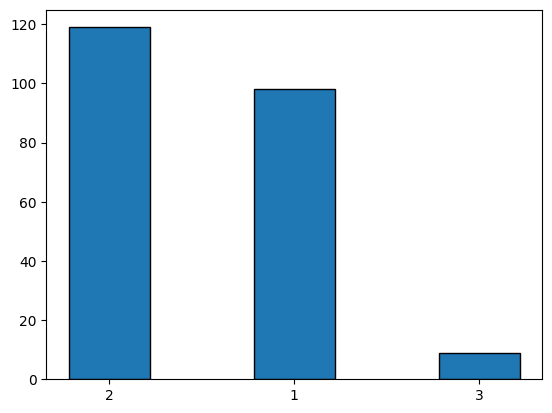

In [33]:
width = 0.35 # the width of the bars
x = [0, 0.8, 1.6] # the bar positions on x-axis
situation_counts =nutri['situation'].value_counts()
plt.bar(x, situation_counts , width , edgecolor = 'black')
plt.xticks(x, situation_counts.index)
plt.show ()

### Plotting Quantitative Variables

#### Boxplot

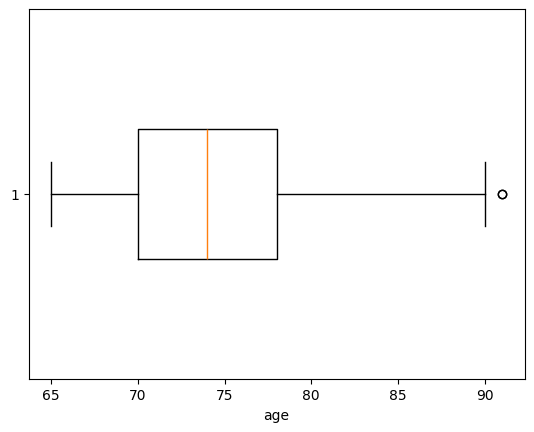

In [34]:
plt.boxplot(nutri['age'],widths=width ,vert=False)
plt.xlabel('age')
plt.show ()

#### Histogram

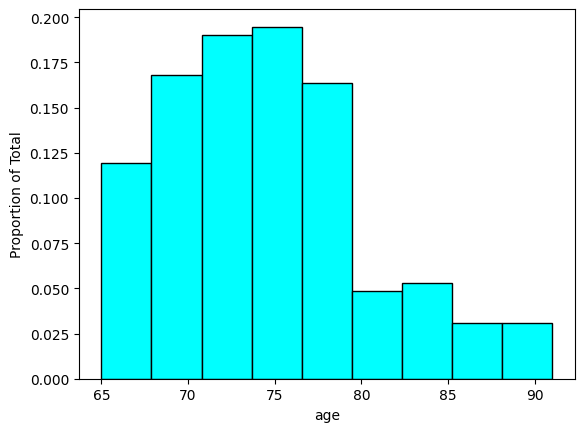

In [35]:
weights = np. ones_like (nutri.age)/nutri.age.count ()
plt.hist(nutri.age ,bins =9, weights=weights , facecolor ='cyan', edgecolor ='black', linewidth =1)
plt.xlabel('age')
plt.ylabel('Proportion of Total')
plt.show ()

#### Empirical Cumulative Distribution Function

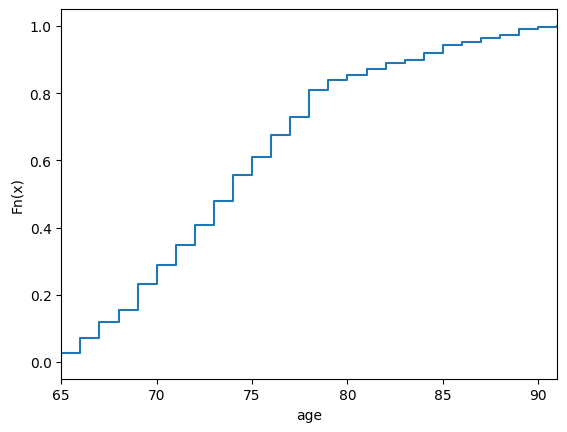

In [36]:
x = np.sort(nutri.age)
y = np.linspace (0,1,len(nutri.age))
plt.xlabel('age')
plt.ylabel('Fn(x)')
plt.step(x,y)
plt.xlim(x.min(),x.max())
plt.show ()

### Data Visualization in a Bivariate Setting

In this section, we present a few useful visual aids to explore relationships between two
features. The graphical representation will depend on the type of the two features.

#### Two-way Plots for Two Categorical Variables

In [38]:
import seaborn as sns

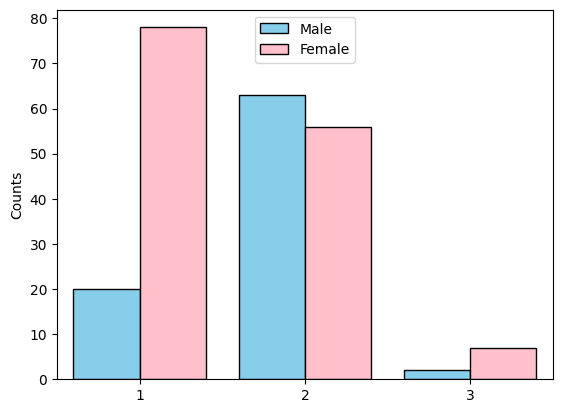

In [39]:
sns.countplot(x='situation', 
              hue = 'gender', 
              data=nutri ,
              hue_order = ['Male', 'Female'], 
              palette = ['SkyBlue','Pink'],
              saturation = 1, 
              edgecolor ='black')
plt.legend(loc='upper center')
plt.xlabel('')
plt.ylabel('Counts')
plt.show ()

#### Plots for Two Quantitative Variables

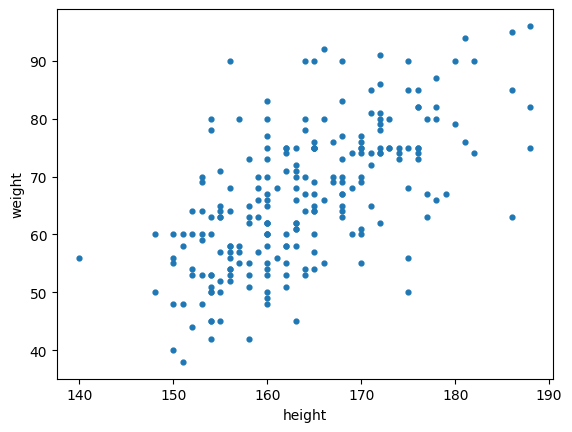

In [40]:
plt.scatter(nutri.height , nutri.weight , s=12, marker='o')
plt.xlabel('height')
plt.ylabel('weight')
plt.show ()

In [42]:
urlprefix = 'https://vincentarelbundock.github.io/Rdatasets/csv/'
dataname = 'MASS/birthwt.csv'
bwt = pd.read_csv( urlprefix + dataname)
bwt.head()

,rownames,low,age,lwt,...,ht,ui,ftv,bwt
0,85,0,19,182,...,0,1,0,2523
1,86,0,33,155,...,0,0,3,2551
2,87,0,20,105,...,0,0,1,2557
3,88,0,21,108,...,0,1,2,2594
4,89,0,18,107,...,0,1,0,2600


In [43]:
bwt.columns

Index(['rownames', 'low', 'age', 'lwt', 'race', 'smoke', 'ptl', 'ht', 'ui',
       'ftv', 'bwt'],
      dtype='object')

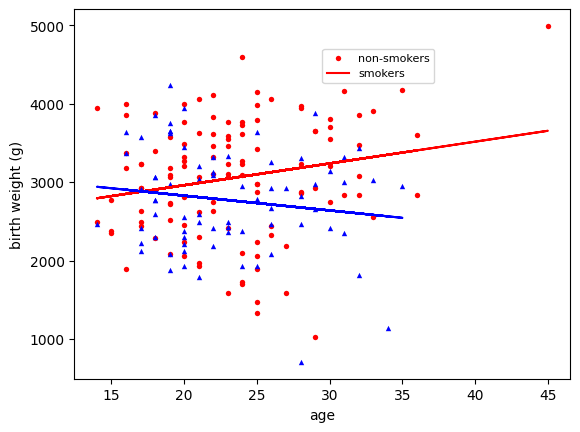

In [44]:
# bwt = bwt.drop('Unnamed: 0',1) #drop unnamed column
styles = {0: ['o','red'], 1: ['^','blue']}
for k in styles:
    grp = bwt[bwt.smoke ==k]
    m,b = np.polyfit(grp.age , grp.bwt , 1) # fit a straight line
    plt.scatter(grp.age , grp.bwt , c=styles[k][1] , s=15, linewidth =0,
                marker = styles[k][0])
    plt.plot(grp.age , m*grp.age + b, '-', color=styles[k][1])

plt.xlabel('age')
plt.ylabel('birth weight (g)')
plt.legend (['non-smokers','smokers'],prop ={'size':8},

loc =(0.5 ,0.8))

plt.show ()

#### Plots for One Qualitative and One Quantitative Variable

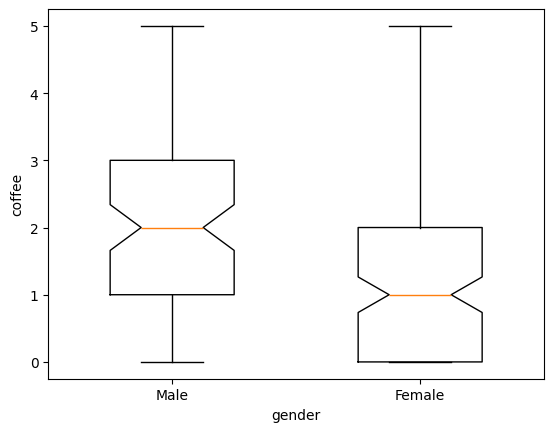

In [45]:
males = nutri[nutri.gender == 'Male']
females = nutri[nutri.gender == 'Female']
plt.boxplot ([ males.coffee ,females.coffee],notch=True ,widths =(0.5 ,0.5))
plt.xlabel('gender')
plt.ylabel('coffee')
plt.xticks ([1 ,2] ,['Male','Female'])
plt.show ()